<h1 align="center"> Homework 5 Programming Task</h1>
<h3 align="center"> IST 5520: Data Science and Machine Learning with Python, 2022 Fall </h3>
<h3 align="center"> Student: XXX </h3>

**Instruction:**

Complete the following tasks (2 points for each task, 14 points in total). You can add additional lines if necessary.

# Task: Dataset Manipulation (14 points)

(1) Read in dataset

The file 'FleetData.csv' contains a dataset of airlines around the world and the airplanes that each owns and operates.

Dataset includes the following information:

- Parent Airline: i.e. International Airlines Group (IAG)
- Airline: i.e. Iberia, Aer Lingus, British Airways...etc. which are owned by IAG
- Aircraft Type: Manufacturer & Model
- Current: Quantity of airplanes in Operation
- Future: Quantity of airplanes on order, from planespotter.net
- Order: Quantity airplanes on order, from Wikipedia
- Unit Cost: Average unit cost (\$M) of Aircraft Type, as found by Wikipedia and various google searches
- Total Cost: Current quantity * Unit Cost (\$M)
- Average Age: Average age of "Current" airplanes by "Aircraft Type"

After import data, show its head.


In [522]:
import pandas as pd

In [523]:
data = pd.read_csv('FleetData.csv')

In [524]:
data.head()

,Parent Airline,Airline,Aircraft Type,Current,Future,Historic,Total,Orders,Unit Cost,Total Cost (Current),Average Age
0,Aegean Airlines,Aegean Airlines,Airbus A319,1.0,NaN,3.0,4.0,NaN,$90,$90,11.6
1,Aegean Airlines,Olympic Air,Airbus A319,NaN,NaN,8.0,8.0,NaN,$90,$0,NaN
2,Aegean Airlines,Aegean Airlines,Airbus A320,38.0,NaN,3.0,41.0,NaN,$98,"$3,724",7.5
3,Aegean Airlines,Olympic Air,Airbus A320,NaN,NaN,9.0,9.0,NaN,$98,$0,NaN
4,Aegean Airlines,Aegean Airlines,Airbus A321,8.0,NaN,NaN,8.0,NaN,$115,$919,10.3


(2) Remove special characters [spaces,'(', and ')'] from column names

For example, column 'Parent Airline' will be renamed as 'ParentAirline', and column 'Total Cost (Current)' will be renamed as 'TotalCostCurrent'.

Hint: Use regular expressions. You can import re first, then use re.sub() method to replace strings in the columns.

In [525]:
import re

In [526]:
for col in data:
	temp = re.sub("[^a-zA-Z]+", "", col)
	data = data.rename({col:temp}, axis=1)

Show the head again to verify the change of column names.

In [527]:
data.head()

,ParentAirline,Airline,AircraftType,Current,Future,Historic,Total,Orders,UnitCost,TotalCostCurrent,AverageAge
0,Aegean Airlines,Aegean Airlines,Airbus A319,1.0,NaN,3.0,4.0,NaN,$90,$90,11.6
1,Aegean Airlines,Olympic Air,Airbus A319,NaN,NaN,8.0,8.0,NaN,$90,$0,NaN
2,Aegean Airlines,Aegean Airlines,Airbus A320,38.0,NaN,3.0,41.0,NaN,$98,"$3,724",7.5
3,Aegean Airlines,Olympic Air,Airbus A320,NaN,NaN,9.0,9.0,NaN,$98,$0,NaN
4,Aegean Airlines,Aegean Airlines,Airbus A321,8.0,NaN,NaN,8.0,NaN,$115,$919,10.3


(3) Remove non-digital symbols such as "$" and "," from all values in columns "UnitCost" and "TotalCostCurrent". Convert these two columns' datatype as float.

In [528]:
data['UnitCost'] = data['UnitCost'].str.replace(r'\D+', '', regex=True).astype('float')

In [529]:
data['TotalCostCurrent'] = data['TotalCostCurrent'].str.replace(r'\D+', '', regex=True).astype('float')

Show the dataset information to verify the change of the datatype of these two columns.

In [530]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ParentAirline     1583 non-null   object 
 1   Airline           1583 non-null   object 
 2   AircraftType      1583 non-null   object 
 3   Current           859 non-null    float64
 4   Future            188 non-null    float64
 5   Historic          1113 non-null   float64
 6   Total             1484 non-null   float64
 7   Orders            348 non-null    float64
 8   UnitCost          1548 non-null   float64
 9   TotalCostCurrent  1556 non-null   float64
 10  AverageAge        820 non-null    float64
dtypes: float64(8), object(3)
memory usage: 136.2+ KB


(4) Calculate the number of unique Airline companies in the dataset.

In [531]:
print(len(pd.unique(data['Airline'])))

280


(5) Calculate the number of unique Parent Airline companies.

In [532]:
print(len(pd.unique(data['ParentAirline'])))

117


(6) Calculate the number of airplanes in operation for each parent airline. 

First, create a new dataset that only contains the 'ParentAirline' and 'Current' columns. 

Then drop all observations that have NAs in the 'ParentAirline' and 'Current' columns.

Then group the new dataset by 'ParentAirline' and calculate the sum of 'Current' value for each parent airline company. Sort the summarized dataset by the number of airplanes in operation in descending order. 

Hint: Check how many rows are in the grouped dataset, if the number of rows does not match the result in step 4, your grouped dataset is not correct.

In [533]:
subdata = data[['ParentAirline','Current']]

In [534]:
subdata = subdata.dropna()

In [535]:
subdata = subdata.groupby(['ParentAirline']).sum().reset_index().sort_values(by=['Current'], ascending=False)

(7) Visualize the top 10 parent airlines with its number of airplanes in operation.

Select the top 10 parent airlines that have the most number of airplanes in operation. Visualize their number of airplanes in operation in a bar chart.

**Hint**: 
- Before you call the plot() method, select the 'Current' column, such that you can plot a series object rather than a DataFrame with multiple columns.
- You can set the pamater kind = 'bar' in the plot() method to draw a bar chart. 


<AxesSubplot:xlabel='ParentAirline', ylabel='Current # of planes'>

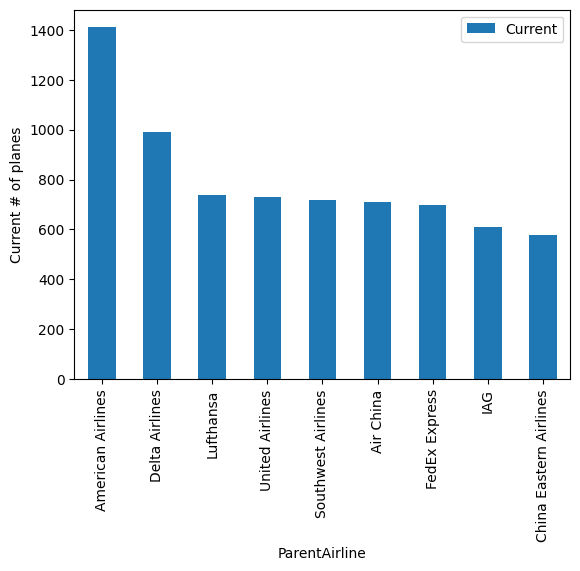

In [536]:
subdata.iloc[:9].plot(x='ParentAirline', y='Current', kind='bar', ylabel='Current # of planes')